# **Clasificador de imagenes usando redes neuronales**

En este tutorial, entrenará una red neuronal totalmente conectada para realizar la clasificación de imágenes en dientes de león y hierba. Utilizaremos TensorFlow/Keras para construir nuestra red neuronal y conjunto de datos de entrenamiento/validación. Primero, descarguemos los datos de capacitación y validación


### Creación del conjunto de datos de imágenes

El set de datos corresponden a una colección de fotos desde internet

In [1]:
!wget --no-check-certificate \
    https://github.com/btphan95/simple-cnn/blob/master/train.zip?raw=true \
    -O /tmp/train.zip

--2022-08-25 22:31:05--  https://github.com/btphan95/simple-cnn/blob/master/train.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/btphan95/simple-cnn/raw/master/train.zip [following]
--2022-08-25 22:31:05--  https://github.com/btphan95/simple-cnn/raw/master/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/btphan95/simple-cnn/master/train.zip [following]
--2022-08-25 22:31:05--  https://raw.githubusercontent.com/btphan95/simple-cnn/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11

In [2]:
!wget --no-check-certificate \
    https://github.com/btphan95/simple-cnn/blob/master/valid.zip?raw=true \
    -O /tmp/valid.zip

--2022-08-25 22:31:06--  https://github.com/btphan95/simple-cnn/blob/master/valid.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/btphan95/simple-cnn/raw/master/valid.zip [following]
--2022-08-25 22:31:07--  https://github.com/btphan95/simple-cnn/raw/master/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/btphan95/simple-cnn/master/valid.zip [following]
--2022-08-25 22:31:07--  https://raw.githubusercontent.com/btphan95/simple-cnn/master/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19

El siguiente código python usará la biblioteca del sistema operativo para usar las bibliotecas del sistema operativo, lo que le dará acceso al sistema de archivos y a la biblioteca zipfile que le permitirá descomprimir los datos.

In [3]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

El contenido de los .zip se extrae al directorio '/tmp/train', que a su vez contiene los subdirectorios 'diente de león' y 'hierba'.

Lo que verá más adelante es que usaremos la clase [ImageGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) para crear automáticamente nuestro conjunto de datos a partir de este directorio de trenes, utilizando los subdirectorios para las clases.

Definamos cada uno de estos subdirectorios:

In [4]:
# Directorio con imagenes de entrenamiento con fotos de dientes de león
train_dandelion_dir = os.path.join('/tmp/train/dandelion')

# Directorio con imagenes de entrenamiento con fotos de hierba
train_grass_dir = os.path.join('/tmp/train/grass')

# Directorio con imagenes de validación con fotos de dientes de león
valid_dandelion_dir = os.path.join('/tmp/valid/dandelion')

# Directorio con imagenes de validación con fotos de hierba
valid_grass_dir = os.path.join('/tmp/valid/grass')

Ahora, veamos cómo se ven los nombres de archivo en los directorios de entrenamiento 'diente de león' y 'hierba':

In [5]:
train_dandelion_names = os.listdir(train_dandelion_dir)
print(train_dandelion_names[:10])

train_grass_names = os.listdir(train_grass_dir)
print(train_grass_names[:10])

validation_dandelion_hames = os.listdir(valid_dandelion_dir)
print(validation_dandelion_hames[:10])

validation_grass_names = os.listdir(valid_grass_dir)
print(validation_grass_names[:10])

['00000205.jpg', '00000211.jpg', '00000373.jpg', '00000339.jpg', '00000060.jpg', '00000444.jpg', '00000420.jpg', '00000430.jpg', '00000343.jpg', '00000006.jpg']
['00000205.jpg', '00000211.jpg', '00000373.jpg', '00000339.jpg', '00000060.jpg', '00000444.jpg', '00000420.jpg', '00000430.jpg', '00000343.jpg', '00000006.jpg']
['00000060.jpg', '00000006.jpg', '00000025.jpg', '00000010.jpg', '00000000.jpg', '00000002.jpg', '00000055.jpg', '00000052.jpg', '00000045.jpg', '00000047.jpg']
['00000060.jpg', '00000006.jpg', '00000025.jpg', '00000010.jpg', '00000000.jpg', '00000002.jpg', '00000055.jpg', '00000052.jpg', '00000045.jpg', '00000047.jpg']


Averigüemos el número total de imágenes de diente de león y hierba en los directorios:

In [6]:
print('total training dandelion images:', len(os.listdir(train_dandelion_dir)))
print('total training grass images:', len(os.listdir(train_grass_dir)))
print('total validation dandelion images:', len(os.listdir(valid_dandelion_dir)))
print('total validation grass images:', len(os.listdir(valid_grass_dir)))

total training dandelion images: 500
total training grass images: 499
total validation dandelion images: 92
total validation grass images: 65


Ahora echemos un vistazo a algunas imágenes para tener una mejor idea de cómo se ven. Primero, configure los parámetros de matplot:

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Para crear un marco con 4 x 4 fotos
nrows = 4
ncols = 4

# iterador de la imágenes
pic_index = 0

Ahora, muestre un lote de 8 imágenes de diente de león y 8 de hierba. Puede volver a ejecutar la celda para ver un lote nuevo cada vez:

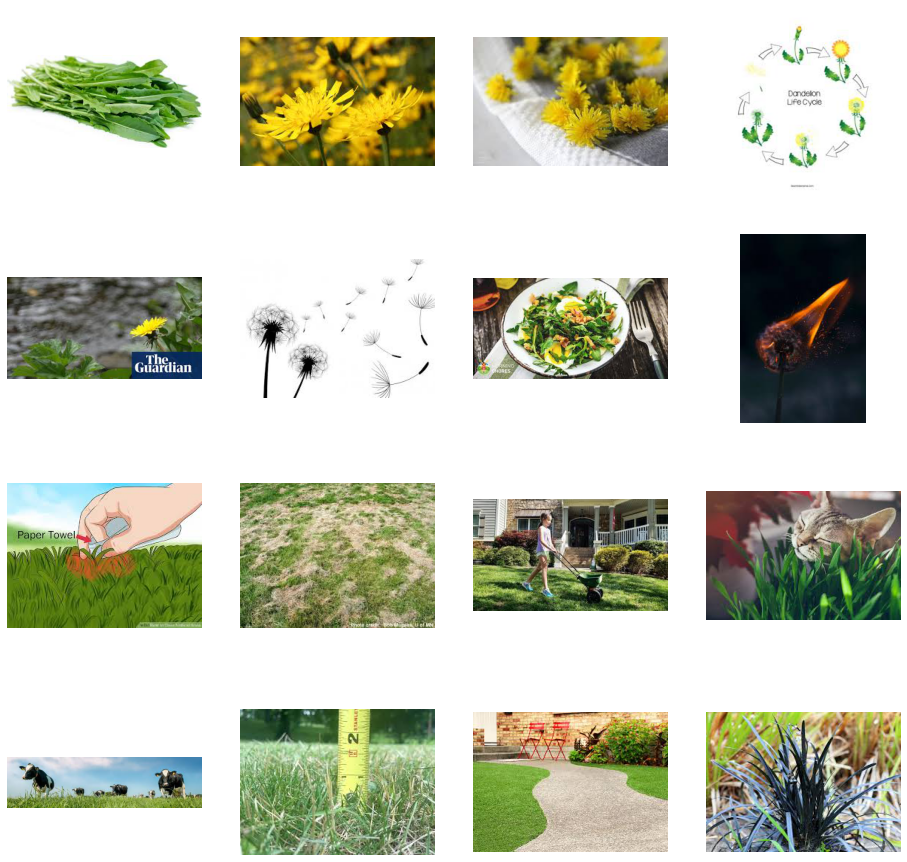

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_dandelion_dir, fname) 
                for fname in train_dandelion_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_grass_dir, fname) 
                for fname in train_grass_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#### Preprocesamiento de datos

Ahora, usemos la clase 'keras.preprocessing.image.ImageDataGenerator' para crear nuestro conjunto de datos de tren y validación y normalizar nuestros datos. 

Es importante normalizar nuestros datos porque los datos que entran en nuestra CNN mejoran su rendimiento general. Usaremos el parámetro 'reescalar' para escalar los valores de píxeles de nuestra imagen de [0, 255] a [0,1].

En cada generador, especificamos el directorio de origen de nuestras imágenes, las clases, el tamaño de la imagen de entrada, el tamaño del lote (cuántas imágenes procesar a la vez) y el modo de clase.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/valid/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 999 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


## Construyendo el modelo desde cero

Pero antes de continuar, comencemos a definir el modelo:

El paso 1 será importar tensorflow.

In [10]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

Luego agreguemos una capa aplanada que aplana la imagen de entrada, que luego alimenta a la siguiente capa, una capa densa o una capa completamente conectada, con 128 unidades ocultas. Finalmente, debido a que nuestro objetivo es realizar la clasificación binaria, nuestra capa final será un sigmoide, de modo que la salida de nuestra red será un único escalar entre 0 y 1, codificando la probabilidad de que la imagen actual sea de clase 1 (clase 1 siendo hierba y clase 0 siendo diente de león).

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

The model.summary() method call prints a summary of the NN 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


The "output shape" column shows the transformation of the dimensions of each layer as a result of the convolution and max pooling - convolution will reduce the layer size by a bit due to padding, and max pooling will halve the output size.

A continuación, configuraremos las especificaciones para el entrenamiento de modelos. Entrenaremos nuestro modelo con la pérdida de 'binary_crossentropy'. Utilizaremos el optimizador 'Adam'. [Adán] (https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) es un algoritmo de optimización sensato porque automatiza el ajuste de la tasa de aprendizaje para nosotros (alternativamente, también podríamos usar [RMSProp] (https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) o [Adagrad] (https://developers.google.com/machine-learning / glossary / #AdaGrad) para resultados similares). Agregaremos precisión a las "métricas" para que el modelo monitoree la precisión durante el entrenamiento.

In [13]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### Entrenamiento
Entrenemos durante 15 épocas.

Tenga en cuenta que steps_per_epoch se estableció junto con batch_size en ImageDataGenerator para que steps_per_epoch * batch_size = número total de imágenes. Por ejemplo, para el entrenamiento, 8 * 120 = 960, justo por debajo de nuestro total de 999 imágenes.

Tenga en cuenta que a medida que entrenamos, nuestra precisión de validación nunca excede la precisión del entrenamiento, lo cual es algo bueno.

In [14]:
history = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 7s 777ms/step - loss: 72.0078 - accuracy: 0.4949 - val_loss: 26.4245 - val_accuracy: 0.6053
Epoch 2/15
8/8 [==============================] - 5s 549ms/step - loss: 7.7322 - accuracy: 0.4881 - val_loss: 0.6938 - val_accuracy: 0.3947
Epoch 3/15
8/8 [==============================] - 3s 374ms/step - loss: 0.6895 - accuracy: 0.5074 - val_loss: 0.7199 - val_accuracy: 0.4276
Epoch 4/15
8/8 [==============================] - 3s 375ms/step - loss: 0.6954 - accuracy: 0.5131 - val_loss: 0.6942 - val_accuracy: 0.3947
Epoch 5/15
8/8 [==============================] - 3s 364ms/step - loss: 0.6923 - accuracy: 0.5040 - val_loss: 0.6942 - val_accuracy: 0.3947
Epoch 6/15
8/8 [==============================] - 3s 370ms/step - loss: 0.6924 - accuracy: 0.4960 - val_loss: 0.6943 - val_accuracy: 0.3947
Epoch 7/15
8/8 [==============================] - 3s 370ms/step - loss: 0.6915 - accuracy: 0.5074 - val_loss: 0.6943 - val_accuracy: 0.3947
Epoch 8/15
8/8 [==

## Hacer predicciones

¡Ahora, usemos el modelo para hacer predicciones! Sube una imagen para ver si es un diente de león o hierba.

Saving Picture1.png to Picture1.png
[0.5023694]
Picture1.png is a grass


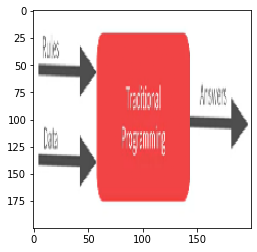

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a dandelion")
  else:
    print(fn + " is a grass")
 